## Observations and Insights

## Dependencies and starter code

In [1]:
# Import the necessary modules
#%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mdata_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
mdata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
mdata_clean_df = mdata_df.drop_duplicates()
mdata_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mdata_grouped = mdata_clean_df.groupby("Drug Regimen")
mdata_mean = mdata_grouped["Tumor Volume (mm3)"].mean()
mdata_median = mdata_grouped["Tumor Volume (mm3)"].median()
mdata_std = mdata_grouped["Tumor Volume (mm3)"].std()
mdata_sem = mdata_grouped["Tumor Volume (mm3)"].sem()

mdata_summary_df = pd.DataFrame({"Mean":mdata_mean, "Median":mdata_median, "Standard Deviation": mdata_std, "SEM": mdata_sem})
mdata_summary_df


,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.368318,50.909965,6.502160,0.514041
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar plots

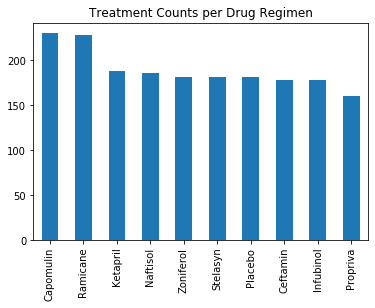

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_bar = mdata_clean_df["Drug Regimen"].value_counts()
drug_bar.plot(kind = "bar")
plt.xlabel=("Drug")
plt.ylabel=("# of Treatments")
plt.title("Treatment Counts per Drug Regimen")
plt.show()

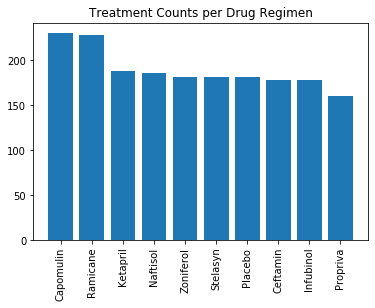

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_bar = mdata_clean_df["Drug Regimen"].value_counts()
x_axis = drug_bar.index.values
plt.bar(x_axis, drug_bar.values)
plt.xticks(rotation="vertical")
plt.xlabel=("Drug")
plt.ylabel=("# of Treatments")
plt.title("Treatment Counts per Drug Regimen")
plt.show()

## Pie plots

In [6]:
drug_pie = mdata_clean_df["Sex"].value_counts()

# Labels for the sections of our pie chart
labels = drug_pie.index.values

# The values of each section of the pie chart
sizes = drug_pie.values

# The colors of each section of the pie chart
colors = ["lightblue", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

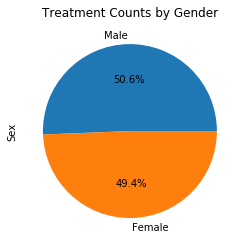

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
drug_pie.plot(kind = "pie",autopct='%1.1f%%')
plt.title("Treatment Counts by Gender")
plt.show()


([<matplotlib.patches.Wedge at 0x1c9e4ae6cc0>,
 [Text(-0.02390896887874883, 1.199761793527013, 'Male'),
  Text(0.02191645183653077, -1.0997816461183998, 'Female')],
 [Text(-0.013946898512603483, 0.699861046224091, '50.6%'),
  Text(0.011954428274471329, -0.5998808978827634, '49.4%')])

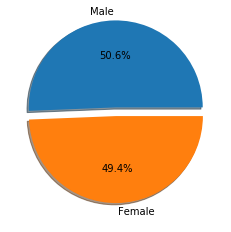

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sizes, explode=explode, labels=labels, 
        autopct="%1.1f%%", shadow=True, startangle=0)

## Quartiles, outliers and boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#bestdrugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#mdata_bestdrugs_df = mdata_clean_df.loc[mdata_clean_df["Drug Regimen"] in bestdrugs]
mdata_mousedeath_df = mdata_clean_df.groupby("Mouse ID")["Timepoint"].max().to_frame().reset_index()
mdata_mousedeath_df.head()

mdata_merged_df = pd.merge(mdata_mousedeath_df, mdata_clean_df, on=("Mouse ID","Timepoint"))
mdata_merged_df.head()


#quartiles = mdata_grouped_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen